In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ids-intrusion-csv/02-28-2018.csv
/kaggle/input/ids-intrusion-csv/03-01-2018.csv
/kaggle/input/ids-intrusion-csv/02-16-2018.csv
/kaggle/input/ids-intrusion-csv/02-15-2018.csv
/kaggle/input/ids-intrusion-csv/02-21-2018.csv
/kaggle/input/ids-intrusion-csv/03-02-2018.csv
/kaggle/input/ids-intrusion-csv/02-22-2018.csv
/kaggle/input/ids-intrusion-csv/02-20-2018.csv
/kaggle/input/ids-intrusion-csv/02-14-2018.csv
/kaggle/input/ids-intrusion-csv/02-23-2018.csv


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%time
df_d1 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-14-2018.csv", low_memory=False)
df_d2 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-15-2018.csv", low_memory=False)
df_d3 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-16-2018.csv", low_memory=False)
df_d4 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-20-2018.csv", low_memory=False)
df_d5 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-21-2018.csv", low_memory=False)
df_d6 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-22-2018.csv", low_memory=False)
df_d7 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-23-2018.csv", low_memory=False)
df_d8 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-28-2018.csv", low_memory=False)
df_d9 = pd.read_csv("/kaggle/input/ids-intrusion-csv/03-01-2018.csv", low_memory=False)
df_d10 = pd.read_csv("/kaggle/input/ids-intrusion-csv/03-02-2018.csv", low_memory=False)

CPU times: user 4min 30s, sys: 26.7 s, total: 4min 56s
Wall time: 5min 44s


In [ ]:
df_d4.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1,inplace=True)

In [ ]:
def fix_data_type(df):

    df = df[df['Dst Port'] != 'Dst Port']

    df['Dst Port'] = df['Dst Port'].astype(int)
    df['Protocol'] = df['Protocol'].astype(int)
    df['Flow Duration'] = df['Flow Duration'].astype(int)
    df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(int)
    df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(int)
    df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(int)
    df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(int)
    df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(int)
    df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(int)
    df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(float)
    df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(float)
    df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(int)
    df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(int)
    df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(float)
    df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(float)
    df['Flow Byts/s'] = df['Flow Byts/s'].astype(float)
    df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(float)
    df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(float)
    df['Flow IAT Std'] = df['Flow IAT Std'].astype(float)
    df['Flow IAT Max'] = df['Flow IAT Max'].astype(int)
    df['Flow IAT Min'] = df['Flow IAT Min'].astype(int)
    df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(int)
    df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(float)
    df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(float)
    df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(int)
    df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(int)
    df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(int)
    df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(float)
    df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(float)
    df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(int)
    df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(int)
    df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(int)
    df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(int)
    df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(int)
    df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(int)
    df['Fwd Header Len'] = df['Fwd Header Len'].astype(int)
    df['Bwd Header Len'] = df['Bwd Header Len'].astype(int)
    df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(float)
    df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(float)
    df['Pkt Len Min'] = df['Pkt Len Min'].astype(int)
    df['Pkt Len Max'] = df['Pkt Len Max'].astype(int)
    df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(float)
    df['Pkt Len Std'] = df['Pkt Len Std'].astype(float)
    df['Pkt Len Var'] = df['Pkt Len Var'].astype(float)
    df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(int)
    df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(int)
    df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(int)
    df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(int)
    df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(int)
    df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(int)
    df['CWE Flag Count'] = df['CWE Flag Count'].astype(int)
    df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(int)
    df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(int)
    df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(float)
    df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(float)
    df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(float)
    df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(int)
    df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(int)
    df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(int)
    df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(int)
    df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(int)
    df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(int)
    df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(int)
    df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(int)
    df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(int)
    df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(int)
    df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(int)
    df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(int)
    df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(int)
    df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(int)
    df['Active Mean'] = df['Active Mean'].astype(float)
    df['Active Std'] = df['Active Std'].astype(float)
    df['Active Max'] = df['Active Max'].astype(int)
    df['Active Min'] = df['Active Min'].astype(int)
    df['Idle Mean'] = df['Idle Mean'].astype(float)
    df['Idle Std'] = df['Idle Std'].astype(float)
    df['Idle Max'] = df['Idle Max'].astype(int)
    df['Idle Min'] = df['Idle Min'].astype(int)

    return df

In [ ]:
%%time
df_d1 = fix_data_type(df_d1)
df_d2 = fix_data_type(df_d2)
df_d3 = fix_data_type(df_d3)
df_d4 = fix_data_type(df_d4)
df_d5 = fix_data_type(df_d5)
df_d6 = fix_data_type(df_d6)
df_d7 = fix_data_type(df_d7)
df_d8 = fix_data_type(df_d8)
df_d9 = fix_data_type(df_d9)
df_d10 = fix_data_type(df_d10)

CPU times: user 28.3 s, sys: 5.51 s, total: 33.9 s
Wall time: 33.9 s


In [ ]:
def drop_infinate_null(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

In [ ]:
%%time
df_d1 = drop_infinate_null(df_d1)
df_d2 = drop_infinate_null(df_d2)
df_d3 = drop_infinate_null(df_d3)
df_d4 = drop_infinate_null(df_d4)
df_d5 = drop_infinate_null(df_d5)
df_d6 = drop_infinate_null(df_d6)
df_d7 = drop_infinate_null(df_d7)
df_d8 = drop_infinate_null(df_d8)
df_d9 = drop_infinate_null(df_d9)
df_d10 = drop_infinate_null(df_d10)

(1048575, 80)
(1044751, 80)
(1048575, 80)
(1040548, 80)
(1048574, 80)
(1048574, 80)
(7948748, 80)
(7889295, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1042965, 80)
(1048575, 80)
(1042867, 80)
(613071, 80)
(606902, 80)
(331100, 80)
(328181, 80)
(1048575, 80)
(1044525, 80)
CPU times: user 33.2 s, sys: 10 s, total: 43.2 s
Wall time: 43.3 s


In [ ]:
def drop_unnecessary_column(df):
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [ ]:
%%time
df_d1 = drop_unnecessary_column(df_d1)
df_d2 = drop_unnecessary_column(df_d2)
df_d3 = drop_unnecessary_column(df_d3)
df_d4 = drop_unnecessary_column(df_d4)
df_d5 = drop_unnecessary_column(df_d5)
df_d6 = drop_unnecessary_column(df_d6)
df_d7 = drop_unnecessary_column(df_d7)
df_d8 = drop_unnecessary_column(df_d8)
df_d9 = drop_unnecessary_column(df_d9)
df_d10 = drop_unnecessary_column(df_d10)

(1044751, 79)
(1040548, 79)
(1048574, 79)
(7889295, 79)
(1048575, 79)
(1042965, 79)
(1042867, 79)
(606902, 79)
(328181, 79)
(1044525, 79)
CPU times: user 2.02 s, sys: 1.23 s, total: 3.25 s
Wall time: 3.24 s


In [ ]:
def generate_binary_label(df):
    # encode the target feature
    df['Threat'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Threat'].unique())
    print(df['Threat'].value_counts())
    return df

In [ ]:
%%time
df_d1 = generate_binary_label(df_d1)
df_d2 = generate_binary_label(df_d2)
df_d3 = generate_binary_label(df_d3)
df_d4 = generate_binary_label(df_d4)
df_d5 = generate_binary_label(df_d5)
df_d6 = generate_binary_label(df_d6)
df_d7 = generate_binary_label(df_d7)
df_d8 = generate_binary_label(df_d8)
df_d9 = generate_binary_label(df_d9)
df_d10 = generate_binary_label(df_d10)

['Benign' 'Malicious']
Threat
Benign       663808
Malicious    380943
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       988050
Malicious     52498
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Malicious    601802
Benign       446772
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       7313104
Malicious     576191
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Malicious    687742
Benign       360833
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       1042603
Malicious        362
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       1042301
Malicious        566
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       538666
Malicious     68236
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       235778
Malicious     92403
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       758334
Malicious    286191
Name: count, dtype: int64
CPU times: user 6.89 s, sys: 6.63 

In [ ]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = []
    for col in props.columns:
        if props[col].dtype != object:

            IsInt = False
            mx = props[col].max()
            mn = props[col].min()

            if not np.isfinite(props[col]).all():
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)

            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)

            else:
                props[col] = props[col].astype(np.float32)

    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [ ]:
%%time
df_d1, _ = reduce_mem_usage(df_d1)
df_d2, _ = reduce_mem_usage(df_d2)
df_d3, _ = reduce_mem_usage(df_d3)
df_d4, _ = reduce_mem_usage(df_d4)
df_d5, _ = reduce_mem_usage(df_d5)
df_d6, _ = reduce_mem_usage(df_d6)
df_d7, _ = reduce_mem_usage(df_d7)
df_d8, _ = reduce_mem_usage(df_d8)
df_d9, _ = reduce_mem_usage(df_d9)
df_d10, _ = reduce_mem_usage(df_d10)

Memory usage of properties dataframe is : 645.6362228393555  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  279.97496700286865  MB
This is  43.364197530864196 % of the initial size
Memory usage of properties dataframe is : 643.0388488769531  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  247.09363174438477  MB
This is  38.425925925925924 % of the initial size
Memory usage of properties dataframe is : 647.9987640380859  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  235.99954986572266  MB
This is  36.41975308641975 % of the initial size
Memory usage of properties dataframe is : 4875.4340744018555  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1941.1450481414795  MB
This is  39.81481481481482 % of the initial size
Memory usage of properties dataframe is : 639.99951171875  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  238.99989414215088  MB
This is  37.343761950740394 % of the initial size
Memory usage of properties dataframe is : 6

In [ ]:
## https://www.researchgate.net/figure/Attack-Types-in-CSE-CIC-IDS2018-dataset_tbl1_333894962

mapping= {'SSH-Bruteforce': 'Brute-force',
          'FTP-BruteForce': 'Brute-force',
          ################ Brute-force

          'Brute Force -XSS': 'Web attack',
          'Brute Force -Web': 'Web attack',
          'SQL Injection': 'Web attack',
          ################ Web attack

          'DoS attacks-Hulk': 'DoS attack',
          'DoS attacks-SlowHTTPTest': 'DoS attack',
          'DoS attacks-Slowloris': 'DoS attack',
          'DoS attacks-GoldenEye': 'DoS attack',
          ################ DoS attack

          'DDOS attack-HOIC': 'DDoS attack',
          'DDOS attack-LOIC-UDP': 'DDoS attack',
          'DDoS attacks-LOIC-HTTP': 'DDoS attack',
          ################ DDoS attack

          'Bot': 'Botnet',
          ################ Botnet

          'Infilteration': 'Infilteration',
          ################ Infilteration

          'Benign': 'Benign',
          'Label': 'Benign',
          ################ Infilteration
    }

def transform_multi_label(df):
    print(df['Label'].value_counts())
    df['Label'] = df['Label'].map(mapping)
    return df

In [ ]:
%%time
df_d1 = transform_multi_label(df_d1)
df_d2 = transform_multi_label(df_d2)
df_d3 = transform_multi_label(df_d3)
df_d4 = transform_multi_label(df_d4)
df_d5 = transform_multi_label(df_d5)
df_d6 = transform_multi_label(df_d6)
df_d7 = transform_multi_label(df_d7)
df_d8 = transform_multi_label(df_d8)
df_d9 = transform_multi_label(df_d9)
df_d10 = transform_multi_label(df_d10)

Label
Benign            663808
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: count, dtype: int64
Label
Benign                   988050
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64
Label
Benign                    7313104
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64
Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64
Label
Benign              1042603
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: count, dtype: int64
Label
Benign              1042301
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64
Label
Benign           538666
Infilteration     68236
Name: count, dtype: int64
Label
Benign           235778
Infil

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

def balance_data(df):
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y)

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())

    return df


In [ ]:
%%time
df_d1 = balance_data(df_d1)
df_d2 = balance_data(df_d2)
df_d3 = balance_data(df_d3)
df_d4 = balance_data(df_d4)
df_d5 = balance_data(df_d5)
df_d6 = balance_data(df_d6)
df_d7 = balance_data(df_d7)
df_d8 = balance_data(df_d8)
df_d9 = balance_data(df_d9)
df_d10 = balance_data(df_d10)


(761886, 80)
Label
Benign         380943
Brute-force    380943
Name: count, dtype: int64
(104996, 80)
Label
Benign        52498
DoS attack    52498
Name: count, dtype: int64
(893544, 80)
Label
Benign        446772
DoS attack    446772
Name: count, dtype: int64
(1152382, 80)
Label
Benign         576191
DDoS attack    576191
Name: count, dtype: int64
(721666, 80)
Label
Benign         360833
DDoS attack    360833
Name: count, dtype: int64
(724, 80)
Label
Benign        362
Web attack    362
Name: count, dtype: int64
(1132, 80)
Label
Benign        566
Web attack    566
Name: count, dtype: int64
(136472, 80)
Label
Benign           68236
Infilteration    68236
Name: count, dtype: int64
(184806, 80)
Label
Benign           92403
Infilteration    92403
Name: count, dtype: int64
(572382, 80)
Label
Benign    286191
Botnet    286191
Name: count, dtype: int64
CPU times: user 1min 49s, sys: 894 ms, total: 1min 50s
Wall time: 1min 50s


In [ ]:
%%time
df_all = pd.concat([df_d1, df_d2], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d1, df_d2

df_all = pd.concat([df_all, df_d3], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d3

df_all = pd.concat([df_all, df_d4], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d4

df_all = pd.concat([df_all, df_d5], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d5

df_all = pd.concat([df_all, df_d6], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d6

df_all = pd.concat([df_all, df_d7], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d7

df_all = pd.concat([df_all, df_d8], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d8

df_all = pd.concat([df_all, df_d9], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d9

df_all = pd.concat([df_all, df_d10], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d10

CPU times: user 1.99 s, sys: 27.7 ms, total: 2.01 s
Wall time: 2.01 s


In [ ]:
# df_all = df_d4
# del df_d4

In [ ]:
print(df_all['Label'].value_counts())

Label
Benign           2264995
DDoS attack       937024
DoS attack        499270
Brute-force       380943
Botnet            286191
Infilteration     160639
Web attack           928
Name: count, dtype: int64


In [ ]:
# attack_df = df_all[df_all["Threat"] != "Benign"]
# normal_df = df_all[df_all["Threat"] == "Benign"].sample(n=len(attack_df))

In [ ]:
# df_all = pd.concat([attack_df, normal_df], axis=0)
# del attack_df, normal_df

In [ ]:
%%time
variances = df_all.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_all = df_all.drop(constant_columns, axis=1)

print(constant_columns)
print (df_all.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(4529990, 72)
CPU times: user 2.77 s, sys: 2.81 ms, total: 2.77 s
Wall time: 2.77 s


In [ ]:
%%time
duplicates = set()
for i in range(0, len(df_all.columns)):
    col1 = df_all.columns[i]
    for j in range(i+1, len(df_all.columns)):
        col2 = df_all.columns[j]
        if(df_all[col1].equals(df_all[col2])):
            duplicates.add(col2)

CPU times: user 2.5 s, sys: 3.58 ms, total: 2.5 s
Wall time: 2.5 s


In [ ]:
print (duplicates)
df_all.drop(duplicates, axis=1, inplace=True)
print (df_all.shape)

{'SYN Flag Cnt', 'Bwd Seg Size Avg', 'CWE Flag Count', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Subflow Fwd Pkts'}
(4529990, 65)


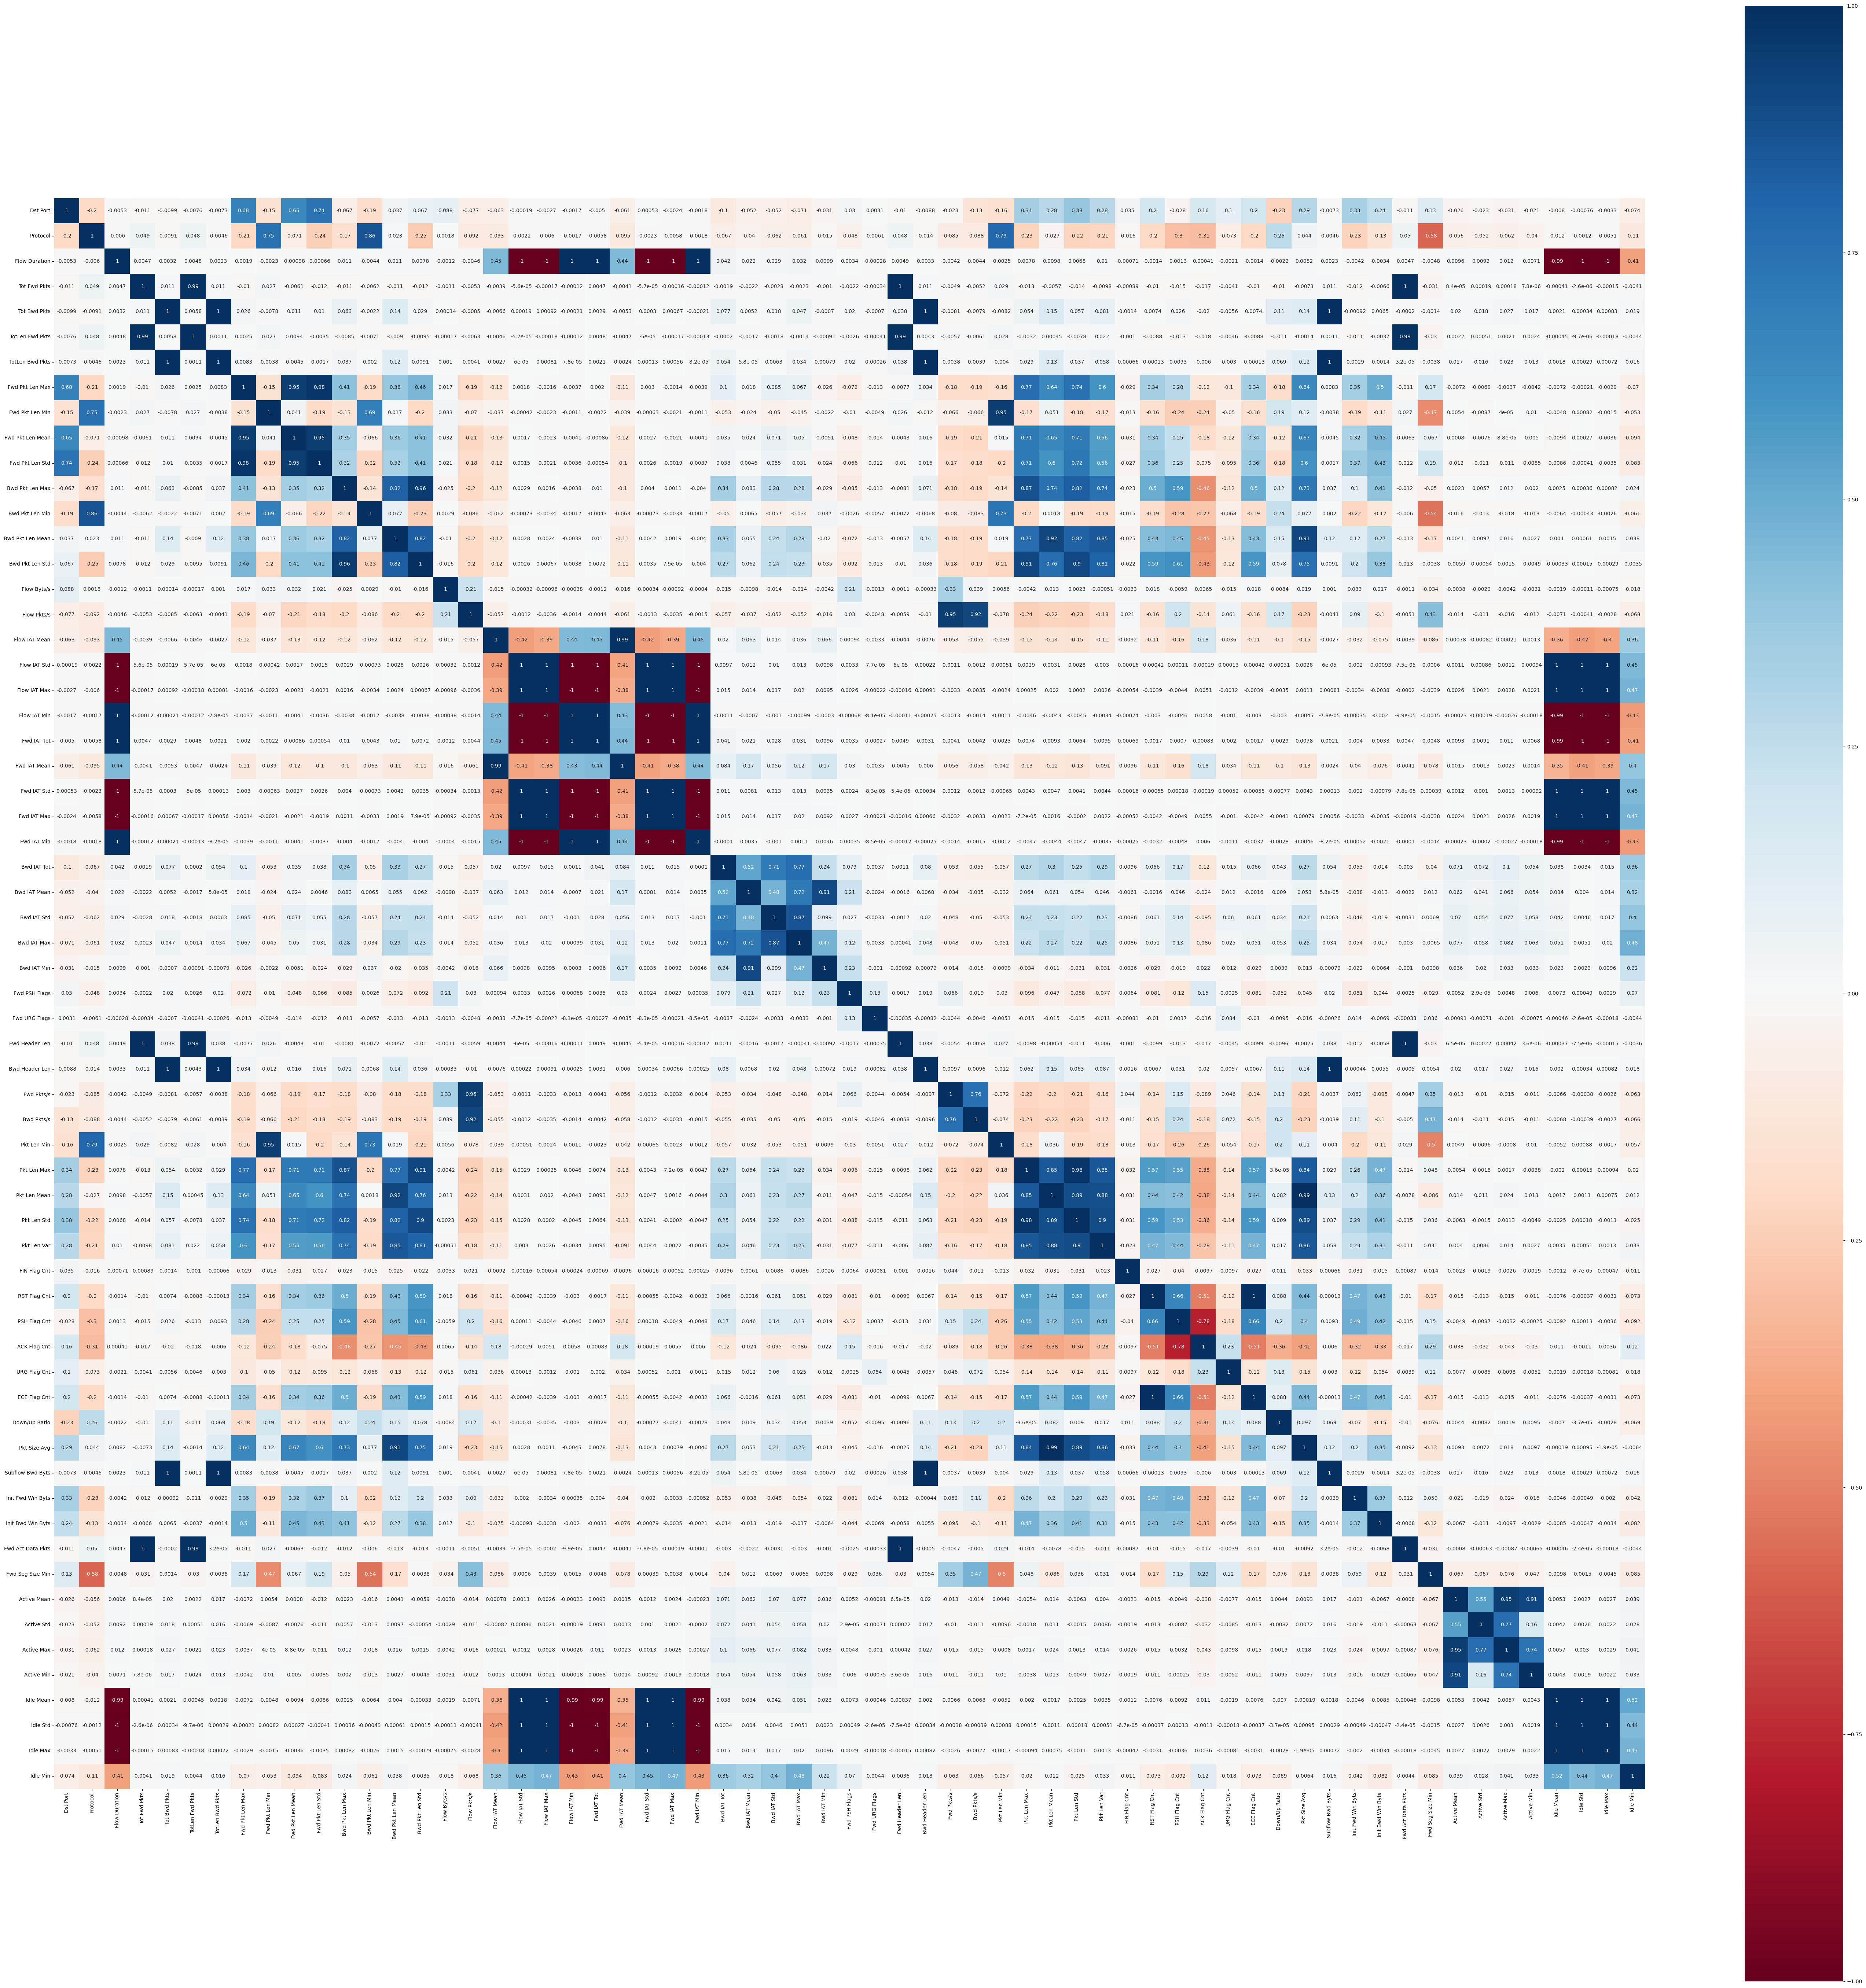

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
            if (np.abs(corr.iloc[i, j]) >= threshold) and (is_correlated[j]):
                colname = corr.columns[j]
                is_correlated[j]=False
                correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Flow IAT Std', 'Pkt Len Mean', 'RST Flag Cnt', 'Fwd IAT Std', 'Idle Mean', 'Fwd Pkt Len Mean', 'Fwd IAT Min', 'Flow IAT Max', 'Flow Pkts/s', 'Idle Std', 'Bwd Pkt Len Max', 'Pkt Len Max', 'Bwd IAT Mean', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Flow IAT Min', 'Fwd Header Len', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Bwd Pkt Len Std', 'Active Mean', 'Fwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Fwd IAT Tot', 'Bwd Header Len', 'Flow Duration', 'Fwd IAT Max', 'Flow IAT Mean', 'TotLen Bwd Pkts'}
29
CPU times: user 68.1 ms, sys: 5 µs, total: 68.1 ms
Wall time: 67.7 ms


In [ ]:
%%time
df_all.drop(correlated_col, axis=1, inplace=True)
print (df_all.shape)

(4529990, 36)
CPU times: user 541 ms, sys: 946 µs, total: 542 ms
Wall time: 541 ms


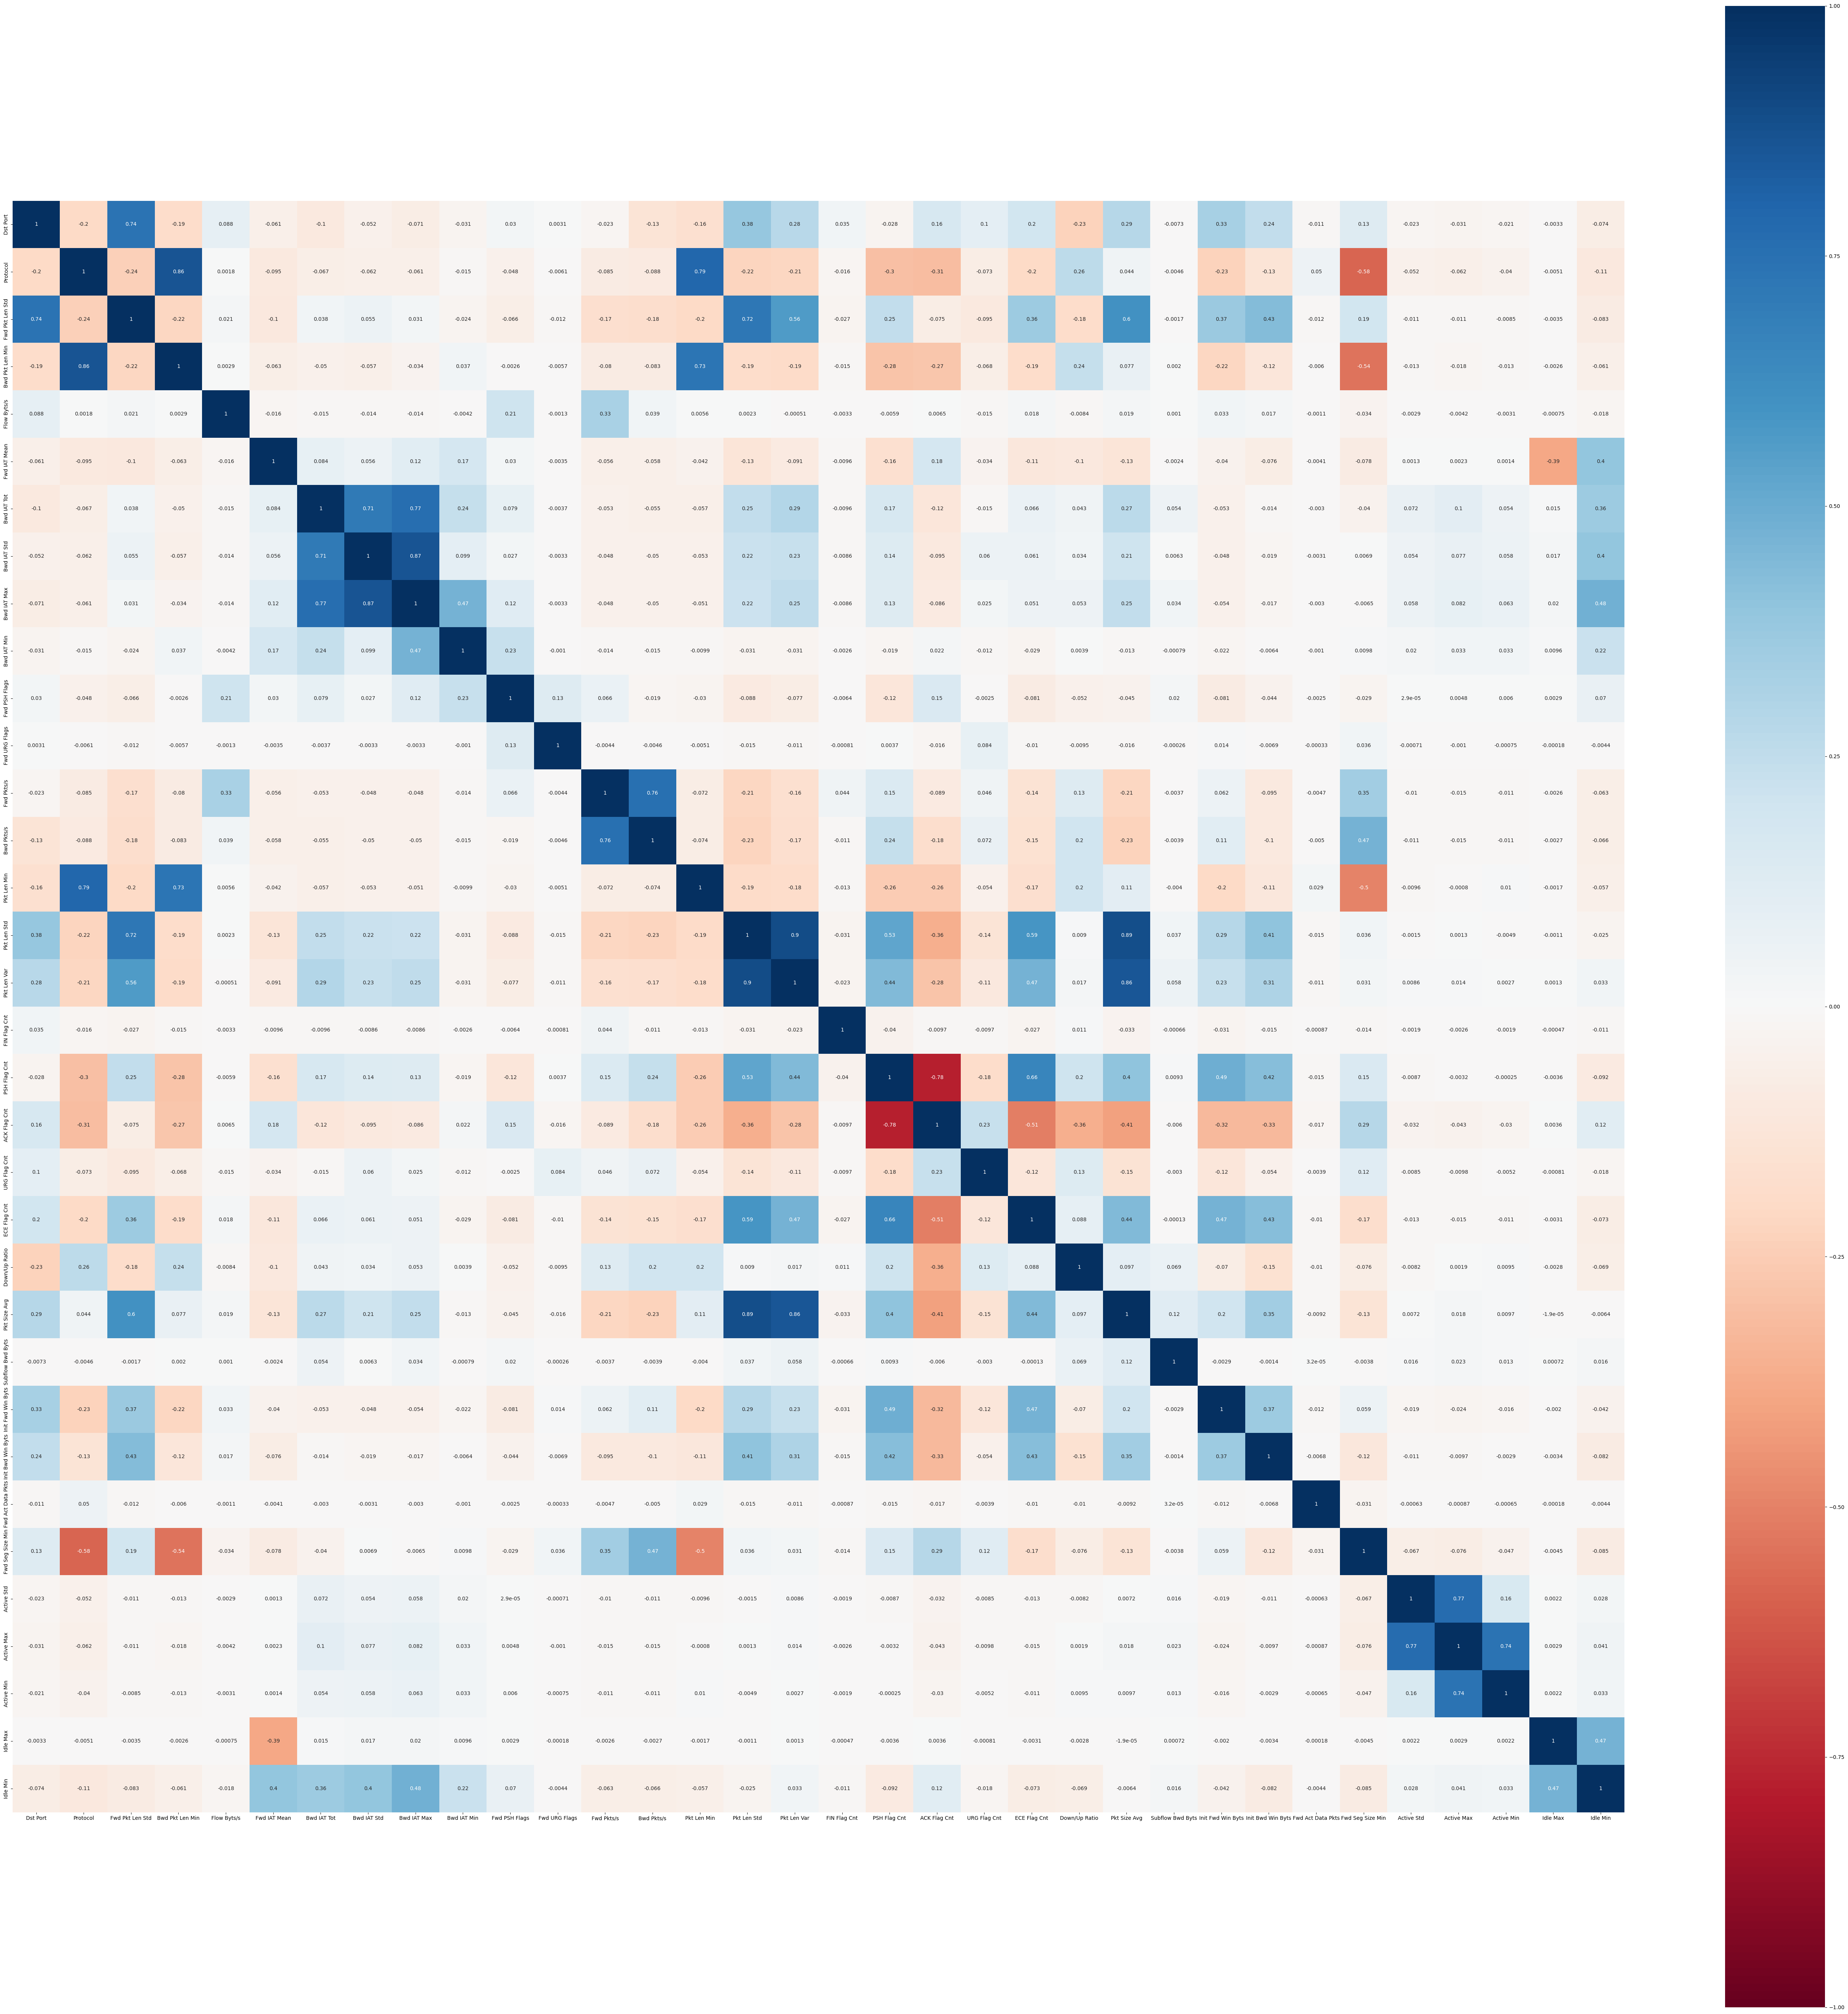

CPU times: user 17.3 s, sys: 478 ms, total: 17.8 s
Wall time: 17.5 s


In [ ]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
label_col = "Label"

In [ ]:
feature_cols = list(df_all.columns)
feature_cols

['Dst Port',
 'Protocol',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Min',
 'Flow Byts/s',
 'Fwd IAT Mean',
 'Bwd IAT Tot',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Fwd URG Flags',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Max',
 'Idle Min',
 'Threat',
 'Label']

In [ ]:
label_col = 'Label'

feature_cols.remove("Threat")
feature_cols.remove(label_col)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=2, shuffle=True, stratify=df_all[label_col])

del df_all

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

minmax_scaler = MinMaxScaler()
train_df[feature_cols] = minmax_scaler.fit_transform(train_df[feature_cols])
test_df[feature_cols] = minmax_scaler.transform(test_df[feature_cols])


In [ ]:
order_label_list = list(np.unique(train_df[label_col]))
order_label_list

['Benign',
 'Botnet',
 'Brute-force',
 'DDoS attack',
 'DoS attack',
 'Infilteration',
 'Web attack']

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=order_label_list,
                                                 y=train_df[label_col].values)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 0.2857142857142857,
 1: 2.261220175569409,
 2: 1.6987903123737271,
 3: 0.6906350330729916,
 4: 1.2961752730414977,
 5: 4.028551196840293,
 6: 696.7875408575273}

In [ ]:
import json

with open("class_weights.json", "w") as outfile:
    json.dump(class_weights, outfile)

In [ ]:
import json

label_dict = {v:v for v in order_label_list}

with open("label_dict.json", "w") as outfile:
    json.dump(label_dict, outfile)


    label_dict

In [ ]:
y_train = [order_label_list.index(k) for k in train_df[label_col]]
y_test = [order_label_list.index(k) for k in test_df[label_col]]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    452999
           1       1.00      0.93      0.96     57238
           2       0.79      1.00      0.88     76189
           3       0.99      1.00      0.99    187405
           4       1.00      0.79      0.88     99854
           5       0.75      0.19      0.30     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.94    905998
   macro avg       0.78      0.70      0.71    905998
weighted avg       0.94      0.94      0.93    905998



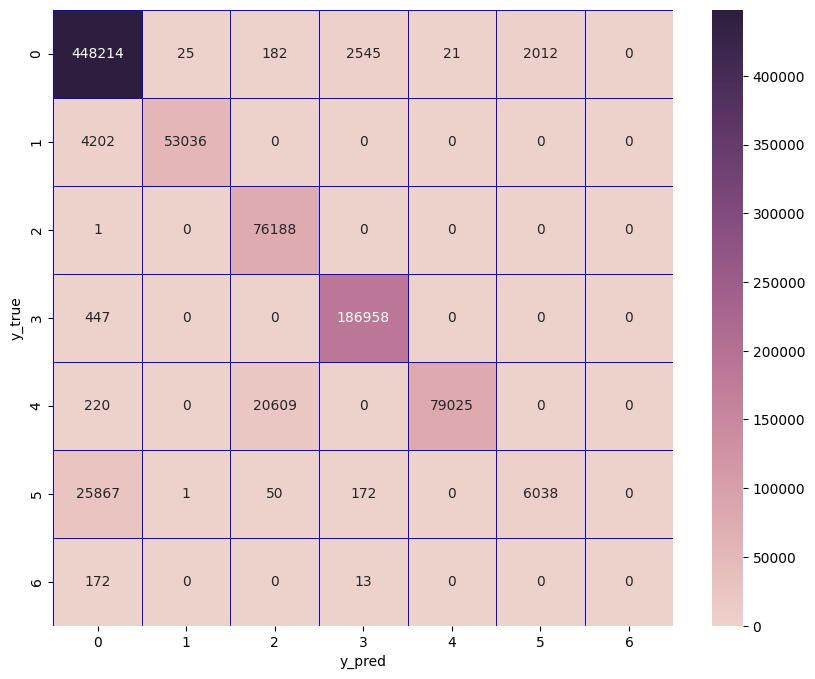

In [ ]:
#Decision Tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
%time
dt.fit(train_df[feature_cols].values, y_train)

y_pred = dt.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    452999
           1       1.00      0.92      0.96     57238
           2       0.79      1.00      0.88     76189
           3       0.95      1.00      0.97    187405
           4       0.99      0.79      0.88     99854
           5       0.00      0.00      0.00     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.93    905998
   macro avg       0.67      0.67      0.66    905998
weighted avg       0.90      0.93      0.91    905998



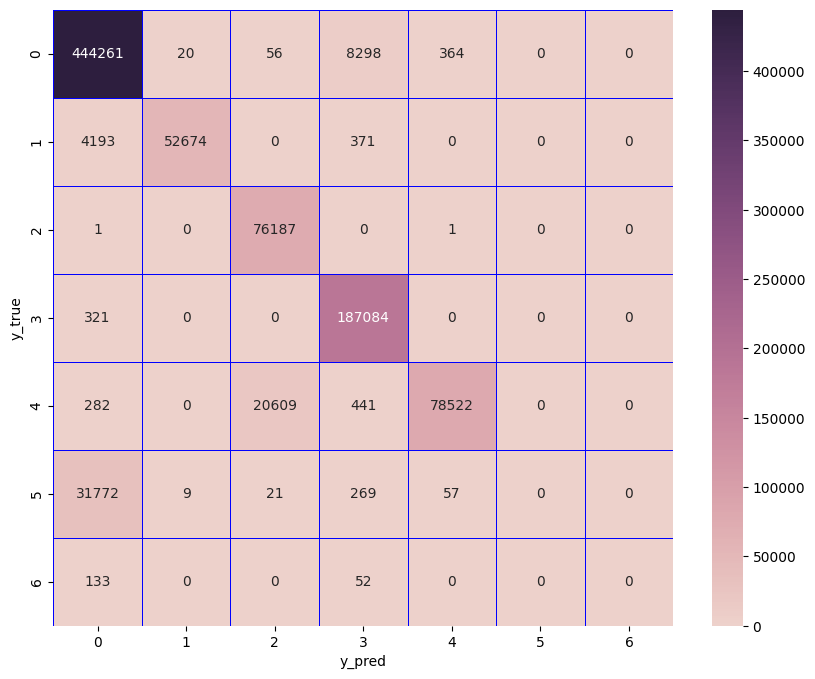

In [ ]:
#Random Forest
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(max_depth=5)
%time
rf.fit(train_df[feature_cols].values, y_train)
y_pred = rf.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    452999
           1       1.00      1.00      1.00     57238
           2       0.87      0.96      0.91     76189
           3       1.00      1.00      1.00    187405
           4       0.96      0.89      0.93     99854
           5       0.74      0.28      0.40     32128
           6       0.98      0.82      0.89       185

    accuracy                           0.95    905998
   macro avg       0.93      0.85      0.87    905998
weighted avg       0.95      0.95      0.95    905998



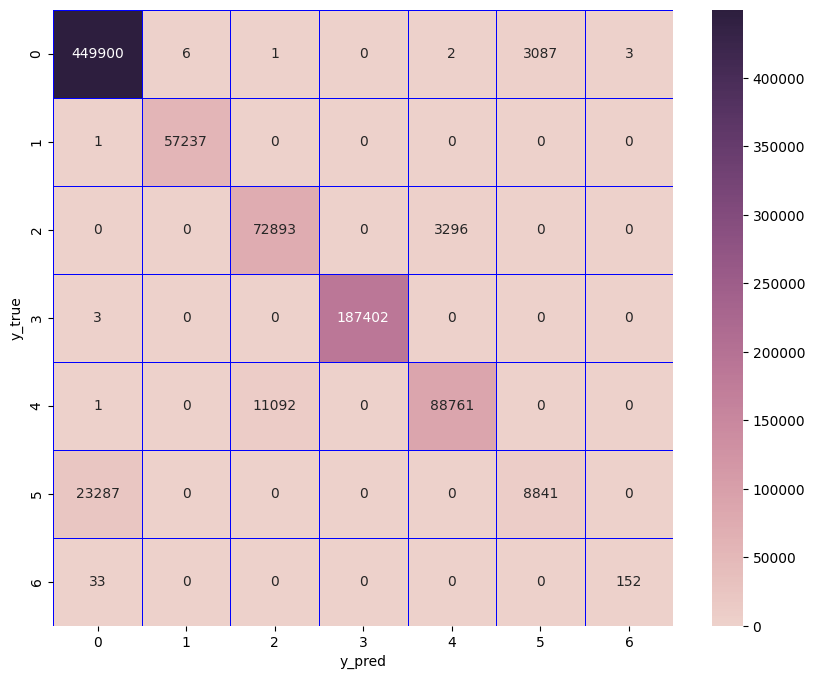

In [ ]:
#xGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier(n_estimators=100)
%time
model.fit(train_df[feature_cols].values, y_train)
y_pred = model.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [ ]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [feature_cols[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

extratrees_importance       Feature_Name
28               0.323706   Fwd Seg Size Min
0                0.217890           Dst Port
9                0.102564        Bwd IAT Min
25               0.059325  Init Fwd Win Byts
13               0.047391         Bwd Pkts/s
4                0.043143        Flow Byts/s
6                0.026323        Bwd IAT Tot
26               0.026014  Init Bwd Win Byts
2                0.022436    Fwd Pkt Len Std
24               0.018236   Subflow Bwd Byts
11               0.014886      Fwd URG Flags
5                0.012681       Fwd IAT Mean
19               0.011337       ACK Flag Cnt
12               0.010750         Fwd Pkts/s
15               0.009843        Pkt Len Std
27               0.009368  Fwd Act Data Pkts
21               0.007887       ECE Flag Cnt
33               0.006878           Idle Min
20               0.004708       URG Flag Cnt
18               0.004671       PSH Flag Cnt
8                0.004220        Bwd IAT Max
23               0.003275       Pkt Size Avg
17               0.002426       FIN Flag Cnt
32               0.002404           Idle Max
31               0.002096         Active Min
3                0.001054    Bwd Pkt Len Min
29               0.001029         Active Std
14               0.001007        Pkt Len Min
22               0.000678      Down/Up Ratio
7                0.000590        Bwd IAT Std
30               0.000580         Active Max
1                0.000373           Protocol
10               0.000231      Fwd PSH Flags
16               0.000000        Pkt Len Var

In [ ]:
from sklearn.feature_selection import SelectFromModel

seletor_model = SelectFromModel(model, prefit=True)

In [ ]:
selected_features = list(seletor_model.get_feature_names_out(input_features=feature_cols))
selected_features

['Dst Port',
 'Flow Byts/s',
 'Bwd IAT Min',
 'Bwd Pkts/s',
 'Init Fwd Win Byts',
 'Fwd Seg Size Min']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    452999
           1       1.00      0.98      0.99     57238
           2       0.79      1.00      0.88     76189
           3       0.92      1.00      0.96    187405
           4       1.00      0.79      0.88     99854
           5       0.75      0.20      0.31     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.93    905998
   macro avg       0.77      0.70      0.71    905998
weighted avg       0.93      0.93      0.92    905998



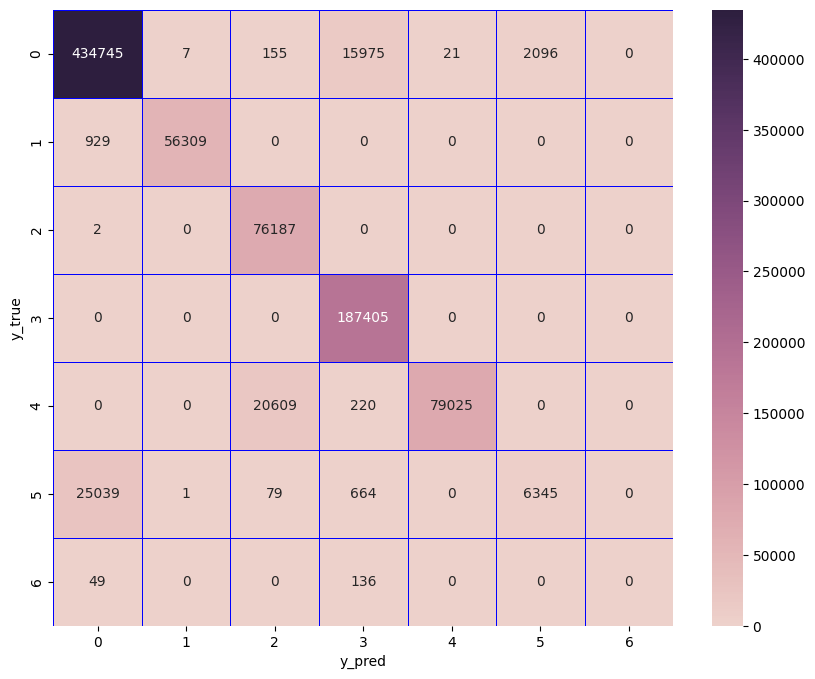

In [ ]:
#Decision Tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
%time
dt.fit(train_df[selected_features].values, y_train)

y_pred = dt.predict(test_df[selected_features].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    452999
           1       1.00      0.93      0.96     57238
           2       0.79      1.00      0.88     76189
           3       0.91      0.98      0.94    187405
           4       1.00      0.79      0.88     99854
           5       0.74      0.16      0.27     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.92    905998
   macro avg       0.77      0.69      0.70    905998
weighted avg       0.92      0.92      0.91    905998



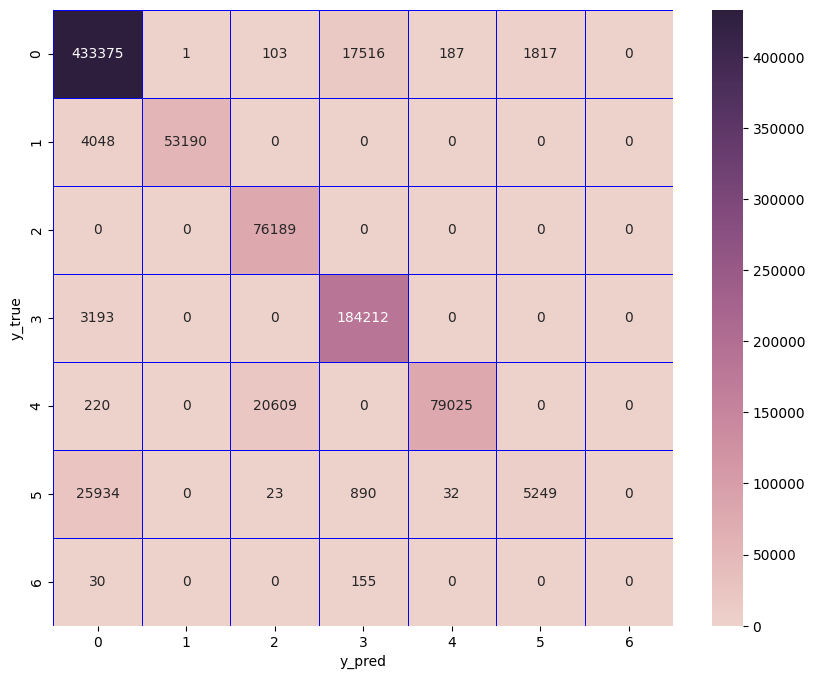

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

rf = RandomForestClassifier(max_depth=5)
%time
rf.fit(train_df[selected_features].values, y_train)

y_pred = rf.predict(test_df[selected_features].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    452999
           1       1.00      1.00      1.00     57238
           2       0.87      0.96      0.91     76189
           3       1.00      1.00      1.00    187405
           4       0.96      0.89      0.93     99854
           5       0.76      0.24      0.37     32128
           6       0.96      0.62      0.75       185

    accuracy                           0.95    905998
   macro avg       0.93      0.81      0.85    905998
weighted avg       0.95      0.95      0.95    905998



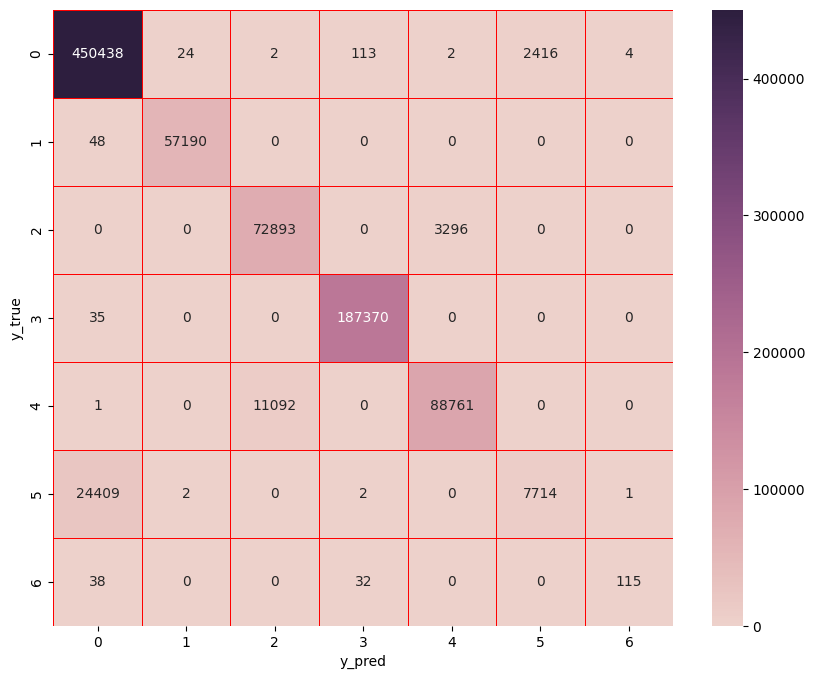

In [ ]:
#xGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier(n_estimators=100)
%time
model.fit(train_df[selected_features].values, y_train)
y_pred = model.predict(test_df[selected_features].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
train_df[feature_cols+[label_col]].to_csv("train_df.csv",index=False)
test_df[feature_cols+[label_col]].to_csv("test_df.csv",index=False)

In [ ]:
del train_df, test_df

In [ ]:
import json

with open('label_dict.json') as json_file:
    label_dict = json.load(json_file)

label_dict

{'Benign': 'Benign',
 'Botnet': 'Botnet',
 'Brute-force': 'Brute-force',
 'DDoS attack': 'DDoS attack',
 'DoS attack': 'DoS attack',
 'Infilteration': 'Infilteration',
 'Web attack': 'Web attack'}

In [ ]:
import json

with open('class_weights.json') as json_file:
    class_weights = json.load(json_file)

class_weights

{'0': 0.2857142857142857,
 '1': 2.261220175569409,
 '2': 1.6987903123737271,
 '3': 0.6906350330729916,
 '4': 1.2961752730414977,
 '5': 4.028551196840293,
 '6': 696.7875408575273}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras import optimizers
import keras.backend as K
import logging.config
from gym import  spaces
import gym
import json
import sys
import time

In [ ]:
class data_cls:
    def __init__(self, train_test, attack_map, **kwargs):
        self.train_test = train_test

        if self.train_test == 'train':
            self.train_path = "train_df.csv"
        else:
            self.test_path = "test_df.csv"

        self.attack_map =   attack_map
        self.attack_types = list(attack_map.keys())

        self.loaded = False


    def get_batch(self, batch_size=100):

        if self.loaded is False:
            self._load_df()

        indexes = list(range(self.index,self.index+batch_size))
        if max(indexes)>self.data_shape[0]-1:
            dif = max(indexes)-self.data_shape[0]
            indexes[len(indexes)-dif-1:len(indexes)] = list(range(dif+1))
            self.index=batch_size-dif
            batch = self.df.iloc[indexes]
        else:
            batch = self.df.iloc[indexes]
            self.index += batch_size

        map_type = pd.Series(index=self.attack_types,data=np.arange(len(self.attack_types))).to_dict()
        labels = batch[label_col].map(self.attack_map).map(map_type).values
        del(batch[label_col])

        return np.array(batch),labels

    def get_full(self):

        self._load_df()

        batch = self.df
        map_type = pd.Series(index=self.attack_types,data=np.arange(len(self.attack_types))).to_dict()
        labels = batch[label_col].map(self.attack_map).map(map_type).values

        del(batch[label_col])

        return np.array(batch), labels

    def get_shape(self):
        if self.loaded is False:
            self._load_df()

        self.data_shape = self.df.shape
        return self.data_shape

    def _load_df(self):
        if self.train_test == 'train':
            self.df = pd.read_csv(self.train_path)
        else:
            self.df = pd.read_csv(self.test_path)

        self.index=np.random.randint(0,self.df.shape[0]-1,dtype=np.int32)
        self.loaded = True

In [ ]:
class NetworkClassificationEnv(gym.Env, data_cls):
    def __init__(self,train_test, attack_map, **kwargs):
        data_cls.__init__(self,train_test, attack_map,**kwargs)
        self.data_shape = self.get_shape()
        self.batch_size = kwargs.get('batch_size', 1)
        self.fails_episode = kwargs.get('fails_episode', 10)

        # Gym spaces
        self.action_space = spaces.Discrete(len(self.attack_types))
        self.observation_space = spaces.Discrete(self.data_shape[0])

        self.observation_len = self.data_shape[1]-1

        self.counter = 0

    def _update_state(self):
        self.states,self.labels = self.get_batch(self.batch_size)


    def reset(self):
        self.states,self.labels = self.get_batch(self.batch_size)
        self.counter = 0

        return self.states

    def _get_rewards(self,actions):
        self.reward = 0
        if actions == self.labels:
            self.reward = 1
        else:
            self.counter += 1

    def step(self,actions):
        self._get_rewards(actions)

        self._update_state()

        if self.counter >= self.fails_episode:
            self.done = True
        else:
            self.done = False

        return self.states, self.reward, self.done


In [ ]:
def huber_loss(y_true, y_pred, clip_value=1):
    assert clip_value > 0.

    x = y_true - y_pred
    if np.isinf(clip_value):
        return .5 * K.square(x)

    condition = K.abs(x) < clip_value
    squared_loss = .5 * K.square(x)
    linear_loss = clip_value * (K.abs(x) - .5 * clip_value)

    if K.backend() == 'tensorflow':
        import tensorflow as tf
        if hasattr(tf, 'select'):
            return tf.select(condition, squared_loss, linear_loss)
        else:
            return tf.where(condition, squared_loss, linear_loss)
    else:
        raise RuntimeError('Unknown backend "{}".'.format(K.backend()))

import keras.losses
keras.losses.huber_loss = huber_loss

In [ ]:
class QNetwork():
    def __init__(self,obs_size,num_actions, hidden_dense_layer_dict = {"Dense_1": {"Size": 100}}, learning_rate=0.001):
        self.model = Sequential()

        self.model.add(Input(shape=(obs_size,)))

        for key, value in hidden_dense_layer_dict.items():
            self.model.add(Dense(value["Size"], activation='relu', name=key))

        self.model.add(Dense(num_actions))

        optimizer = optimizers.Adam(learning_rate)
        self.model.compile(loss=huber_loss,optimizer=optimizer)

    def predict(self,state,batch_size=1):
        return self.model.predict(state,batch_size=batch_size, verbose=0)

    def update(self, states, q):
        loss = self.model.train_on_batch(states, q, class_weight=class_weights)
        return loss

class Policy:
    def __init__(self, num_actions, estimator):
        self.num_actions = num_actions
        self.estimator = estimator

class Epsilon_greedy(Policy):
    def __init__(self,estimator ,num_actions,epsilon,decay_rate, epoch_length):
        Policy.__init__(self, num_actions, estimator)
        self.name = "Epsilon Greedy"
        if (epsilon is None or epsilon < 0 or epsilon > 1):
            print("EpsilonGreedy: Invalid value of epsilon", flush = True)
            sys.exit(0)
        self.epsilon = epsilon
        self.step_counter = 0
        self.epoch_length = epoch_length
        self.decay_rate = decay_rate
        self.epsilon_decay = True

    def get_actions(self,states):
        if np.random.rand() <= self.epsilon:
            actions = np.random.randint(0, self.num_actions,states.shape[0])
        else:
            self.Q = self.estimator.predict(states,states.shape[0])

            actions = []
            for row in range(self.Q.shape[0]):
                best_actions = np.argwhere(self.Q[row] == np.amax(self.Q[row]))
                actions.append(best_actions[np.random.choice(len(best_actions))].item())

        self.step_counter += 1

        if self.epsilon_decay:
            if self.step_counter % self.epoch_length == 0:
                self.epsilon = max(.01, self.epsilon * self.decay_rate**self.step_counter)

        return actions

class Agent(object):
    def __init__(self, actions, obs_size, policy="EpsilonGreedy", **kwargs):

        self.actions = actions
        self.num_actions = len(actions)
        self.obs_size = obs_size

        self.epsilon = kwargs.get('epsilon', 1)
        self.gamma = kwargs.get('gamma', 0.001)
        self.minibatch_size = kwargs.get('minibatch_size', 2)
        self.epoch_length = kwargs.get('epoch_length', 100)
        self.decay_rate = kwargs.get('decay_rate',0.99)
        self.exp_rep = kwargs.get('exp_rep',True)

        if self.exp_rep:
            self.memory = ReplayMemory(self.obs_size, kwargs.get('mem_size', 10))

        self.ddqn_time = 100
        self.ddqn_update = self.ddqn_time

        self.model_network = QNetwork(self.obs_size,
                                      self.num_actions,
                                      kwargs.get('hidden_dense_layer_dict', {"Dense_1": {"Size": 100}}),
                                      kwargs.get('learning_rate', 0.001))

        self.target_model_network = QNetwork(self.obs_size, self.num_actions,
                                             kwargs.get('hidden_dense_layer_dict', {"Dense_1": {"Size": 100}}),
                                             kwargs.get('learning_rate', 0.001))

        self.target_model_network.model.set_weights(self.model_network.model.get_weights())

        if policy == "EpsilonGreedy":
            self.policy = Epsilon_greedy(self.model_network,
                                         len(actions),
                                         self.epsilon,
                                         self.decay_rate,
                                         self.epoch_length)

    def act(self,states):
        actions = self.policy.get_actions(states)
        return actions

    def learn(self, states, actions,next_states, rewards, done):
        if self.exp_rep:
            self.memory.observe(states, actions, rewards, done)
        else:
            self.states = states
            self.actions = actions
            self.next_states = next_states
            self.rewards = rewards
            self.done = done


    def update_model(self):
        if self.exp_rep:
            (states, actions, rewards, next_states, done) = self.memory.sample_minibatch(self.minibatch_size)
        else:
            states = self.states
            rewards = self.rewards
            next_states = self.next_states
            actions = self.actions
            done = self.done

        next_actions = []
        Q_prime = self.model_network.predict(next_states,self.minibatch_size)

        for row in range(Q_prime.shape[0]):
            best_next_actions = np.argwhere(Q_prime[row] == np.amax(Q_prime[row]))
            next_actions.append(best_next_actions[np.random.choice(len(best_next_actions))].item())
        sx = np.arange(len(next_actions))

        Q = self.target_model_network.predict(states,self.minibatch_size)

        targets = rewards.reshape(Q[sx,actions].shape) + \
                  self.gamma * Q_prime[sx,next_actions] * \
                  (1-done.reshape(Q[sx,actions].shape))
        Q[sx,actions] = targets

        loss = self.model_network.model.train_on_batch(states,Q)

        self.ddqn_update -= 1
        if self.ddqn_update == 0:
            self.ddqn_update = self.ddqn_time
            self.target_model_network.model.set_weights(self.model_network.model.get_weights())

        return loss


class ReplayMemory(object):
    def __init__(self, observation_size, max_size):
        self.observation_size = observation_size
        self.num_observed = 0
        self.max_size = max_size
        self.samples = {
                 'obs'      : np.zeros(self.max_size * 1 * self.observation_size,
                                       dtype=np.float32).reshape(self.max_size, self.observation_size),
                 'action'   : np.zeros(self.max_size * 1, dtype=np.int16).reshape(self.max_size, 1),
                 'reward'   : np.zeros(self.max_size * 1).reshape(self.max_size, 1),
                 'terminal' : np.zeros(self.max_size * 1, dtype=np.int16).reshape(self.max_size, 1),
               }

    def observe(self, state, action, reward, done):
        index = self.num_observed % self.max_size
        self.samples['obs'][index, :] = state
        self.samples['action'][index, :] = action
        self.samples['reward'][index, :] = reward
        self.samples['terminal'][index, :] = done

        self.num_observed += 1

    def sample_minibatch(self, minibatch_size):
        max_index = min(self.num_observed, self.max_size) - 1
        sampled_indices = np.random.randint(max_index, size=minibatch_size)

        s      = np.asarray(self.samples['obs'][sampled_indices, :], dtype=np.float32)
        s_next = np.asarray(self.samples['obs'][sampled_indices+1, :], dtype=np.float32)

        a      = self.samples['action'][sampled_indices].reshape(minibatch_size)
        r      = self.samples['reward'][sampled_indices].reshape((minibatch_size, 1))
        done   = self.samples['terminal'][sampled_indices].reshape((minibatch_size, 1))

        return (s, a, r, s_next, done)

In [ ]:
import shutil

if os.path.isdir("models"):
    shutil.rmtree("models", ignore_errors=False, onerror=None)

In [ ]:
label_col = 'Label'

In [ ]:
model_path = "models"

epsilon = 1

batch_size = 1

minibatch_size = 100
exp_rep = True

iterations_episode = 100

decay_rate = 0.99
gamma = 0.001

learning_rate = 0.001

hidden_dense_layer_dict = {"Dense_2": {"Size": 64},
                           "Dense_3": {"Size": 32}
                           }

env = NetworkClassificationEnv('train',
                                label_dict,
                                batch_size = batch_size,
                                iterations_episode = iterations_episode)

# num_episodes = int(env.data_shape[0]/(iterations_episode)/10)
num_episodes = 300
valid_actions = list(range(len(env.attack_types)))
num_actions = len(valid_actions)

obs_size = env.observation_len

agent = Agent(valid_actions,
              obs_size,
              "EpsilonGreedy",
              learning_rate = learning_rate,
              epoch_length = iterations_episode,
              epsilon = epsilon,
              decay_rate = decay_rate,
              gamma = gamma,
              hidden_dense_layer_dict = hidden_dense_layer_dict,
              minibatch_size=minibatch_size,
              mem_size = 10000,
              exp_rep=exp_rep)


# Statistics
reward_chain = []
loss_chain = []


In [ ]:
# Main loop
for epoch in range(num_episodes):
    start_time = time.time()
    loss = 0.
    total_reward_by_episode = 0

    states = env.reset()

    done = False

    true_labels = np.zeros(len(env.attack_types))
    estimated_labels = np.zeros(len(env.attack_types))

    for i_iteration in range(iterations_episode):
        actions = agent.act(states)

        estimated_labels[actions] += 1
        true_labels[env.labels] += 1

        next_states, reward, done = env.step(actions)
        agent.learn(states, actions, next_states, reward, done)

        if exp_rep and epoch*iterations_episode + i_iteration >= minibatch_size:
            loss += agent.update_model()
        elif not exp_rep:
            loss += agent.update_model()

        update_end_time = time.time()

        states = next_states

        total_reward_by_episode += np.sum(reward, dtype=np.int32)

    reward_chain.append(total_reward_by_episode)
    loss_chain.append(loss)


    end_time = time.time()
    print("\r|Epoch {:03d}/{:03d} | Loss {:4.4f} |"
            "Tot reward in ep {:03d}| time: {:2.2f}|"
            .format(epoch, num_episodes
            ,loss, total_reward_by_episode,(end_time-start_time)))
    print("\r|Estimated: {}|Labels: {}".format(estimated_labels,true_labels))

if not os.path.exists('models'):
    os.makedirs('models')

agent.model_network.model.save_weights("models/DDQN_model.h5", overwrite=True)
with open("models/DDQN_model.json", "w") as outfile:
    json.dump(agent.model_network.model.to_json(), outfile)

|Epoch 000/300 | Loss 0.0000 |Tot reward in ep 020| time: 0.13|
|Estimated: [15. 12. 12. 15. 14. 18. 14.]|Labels: [44.  6.  9. 26. 12.  3.  0.]
|Epoch 001/300 | Loss 1.1587 |Tot reward in ep 016| time: 15.92|
|Estimated: [26. 28.  4.  6. 10.  8. 18.]|Labels: [48.  4.  8. 20. 14.  6.  0.]
|Epoch 002/300 | Loss 0.8838 |Tot reward in ep 046| time: 14.77|
|Estimated: [47. 35.  0.  8.  7.  0.  3.]|Labels: [48.  8.  7. 18. 13.  6.  0.]
|Epoch 003/300 | Loss 0.7483 |Tot reward in ep 053| time: 14.76|
|Estimated: [46. 18.  0.  9. 18.  0.  9.]|Labels: [49.  5. 15. 15. 14.  2.  0.]
|Epoch 004/300 | Loss 0.6484 |Tot reward in ep 048| time: 15.35|
|Estimated: [42. 18.  1. 20. 11.  0.  8.]|Labels: [44.  5. 12. 23. 11.  5.  0.]
|Epoch 005/300 | Loss 0.6362 |Tot reward in ep 062| time: 14.86|
|Estimated: [47. 17.  0. 23.  8.  1.  4.]|Labels: [54.  4.  8. 22. 11.  1.  0.]
|Epoch 006/300 | Loss 0.5649 |Tot reward in ep 070| time: 14.70|
|Estimated: [54. 13.  1. 25.  4.  0.  3.]|Labels: [52.  3.  2. 26.

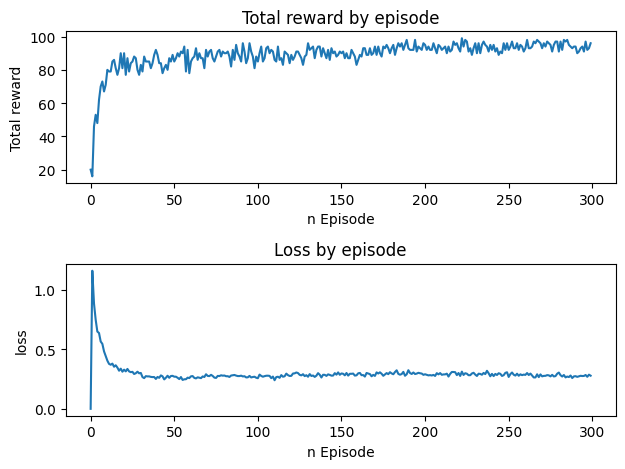

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(np.arange(len(reward_chain)),reward_chain)
plt.title('Total reward by episode')
plt.xlabel('n Episode')
plt.ylabel('Total reward')
''
plt.subplot(212)
plt.plot(np.arange(len(loss_chain)),loss_chain)
plt.title('Loss by episode')
plt.xlabel('n Episode')
plt.ylabel('loss')
plt.tight_layout()
#plt.show()


if not os.path.exists('results'):
    os.makedirs('results')

plt.savefig('results/train_type_improved.eps', format='eps', dpi=1000)

In [ ]:
import json
import numpy as np
import pandas as pd
from keras.models import model_from_json
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import  confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
with open("models/DDQN_model.json", "r") as jfile:
    model = model_from_json(json.load(jfile))
model.load_weights("models/DDQN_model.h5")


model.compile(loss=huber_loss, optimizer="sgd")

env = NetworkClassificationEnv('test', label_dict)

In [ ]:
total_reward = 0

true_labels = np.zeros(len(env.attack_types),dtype=int)
estimated_labels = np.zeros(len(env.attack_types),dtype=int)
estimated_correct_labels = np.zeros(len(env.attack_types),dtype=int)

states, labels = env.get_full()
q = model.predict(states)
actions = np.argmax(q, axis=1)


labs, true_labels = np.unique(labels, return_counts=True)

for indx,a in enumerate(actions):
    estimated_labels[a] +=1
    if a == labels[indx]:
        total_reward += 1
        estimated_correct_labels[a] += 1


Accuracy = estimated_correct_labels / true_labels
Mismatch = estimated_labels - true_labels

print('\r\nTotal reward: {} | Number of samples: {} | Accuracy = {}%'.format(total_reward,
      len(states),float(100*total_reward/len(states))))
outputs_df = pd.DataFrame(index = env.attack_types,columns = ["Estimated","Correct","Total","Acuracy"])
for indx,att in enumerate(env.attack_types):
    outputs_df.iloc[indx].Estimated = estimated_labels[indx]
    outputs_df.iloc[indx].Correct = estimated_correct_labels[indx]
    outputs_df.iloc[indx].Total = true_labels[indx]
    outputs_df.iloc[indx].Acuracy = Accuracy[indx]*100
    outputs_df.iloc[indx].Mismatch = abs(Mismatch[indx])

28313/28313 [==============================] - 36s 1ms/step

Total reward: 857233 | Number of samples: 905998 | Accuracy = 94.61753778705913%


In [ ]:
outputs_df

Estimated Correct   Total    Acuracy
Benign           478114  449659  452999  99.262692
Botnet            57762   57187   57238  99.910898
Brute-force       85786   72792   76189  95.541351
DDoS attack      188030  186728  187405   99.63875
DoS attack        90245   86426   99854  86.552366
Infilteration      6061    4441   32128  13.822834
Web attack            0       0     185        0.0

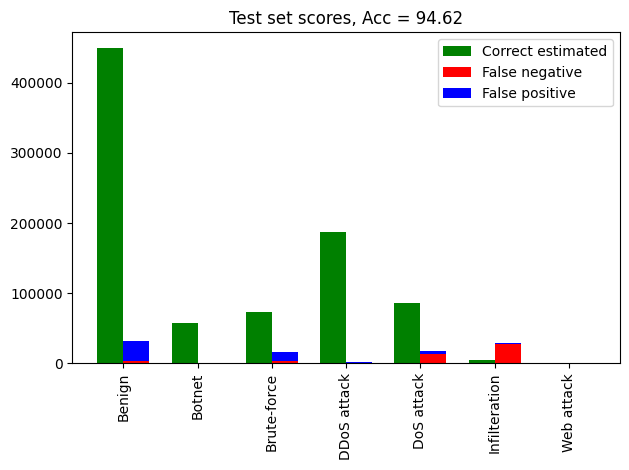

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
width = 0.35
pos = np.arange(len(true_labels))
p1 = plt.bar(pos, estimated_correct_labels,width,color='g')
p1 = plt.bar(pos+width,
             (np.abs(estimated_correct_labels-true_labels)),width,
             color='r')
p2 = plt.bar(pos+width,np.abs(estimated_labels-estimated_correct_labels),width,
             bottom=(np.abs(estimated_correct_labels-true_labels)),
             color='b')


ax.set_xticks(pos+width/2)
ax.set_xticklabels(env.attack_types,rotation='vertical')

ax.set_title('Test set scores, Acc = {:.2f}'.format(100*total_reward/len(states)))
plt.legend(('Correct estimated','False negative','False positive'))
plt.tight_layout()
plt.show()
plt.savefig('results/ADFA_DDQN.svg', format='svg', dpi=1000)


Performance measures on Test data
Accuracy =  0.9462
F1 =  0.9356
Precision_score =  0.9411
recall_score =  0.9462
Normalized confusion matrix
[[9.93e-01 5.52e-04 1.72e-04 2.41e-03 6.80e-04 3.56e-03 0.00e+00]
 [8.91e-04 9.99e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 9.55e-01 0.00e+00 4.46e-02 0.00e+00 0.00e+00]
 [2.20e-03 1.36e-03 4.80e-05 9.96e-01 0.00e+00 0.00e+00 0.00e+00]
 [5.17e-03 0.00e+00 1.29e-01 0.00e+00 8.66e-01 7.01e-05 0.00e+00]
 [8.50e-01 2.18e-03 6.23e-05 6.04e-03 3.55e-03 1.38e-01 0.00e+00]
 [9.08e-01 0.00e+00 0.00e+00 9.19e-02 0.00e+00 0.00e+00 0.00e+00]]


<Figure size 640x480 with 0 Axes>

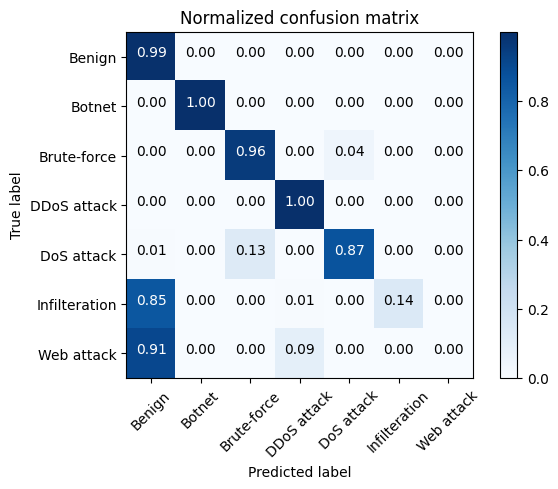

In [ ]:
aggregated_data_test =labels

print('Performance measures on Test data')
print('Accuracy =  {:.4f}'.format(accuracy_score( aggregated_data_test,actions)))
print('F1 =  {:.4f}'.format(f1_score(aggregated_data_test,actions, average='weighted')))
print('Precision_score =  {:.4f}'.format(precision_score(aggregated_data_test,actions, average='weighted')))
print('recall_score =  {:.4f}'.format(recall_score(aggregated_data_test,actions, average='weighted')))

cnf_matrix = confusion_matrix(aggregated_data_test,actions)
np.set_printoptions(precision=2)
plt.figure()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=env.attack_types, normalize=True,
                      title='Normalized confusion matrix')




plt.savefig('results/confusion_matrix_DDQN_model.svg', format='svg', dpi=1000)


              precision    recall  f1-score   support

           0       0.94      0.99      0.97    452999
           1       0.99      1.00      0.99     57238
           2       0.85      0.96      0.90     76189
           3       0.99      1.00      0.99    187405
           4       0.96      0.87      0.91     99854
           5       0.73      0.14      0.23     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.95    905998
   macro avg       0.78      0.71      0.71    905998
weighted avg       0.94      0.95      0.94    905998



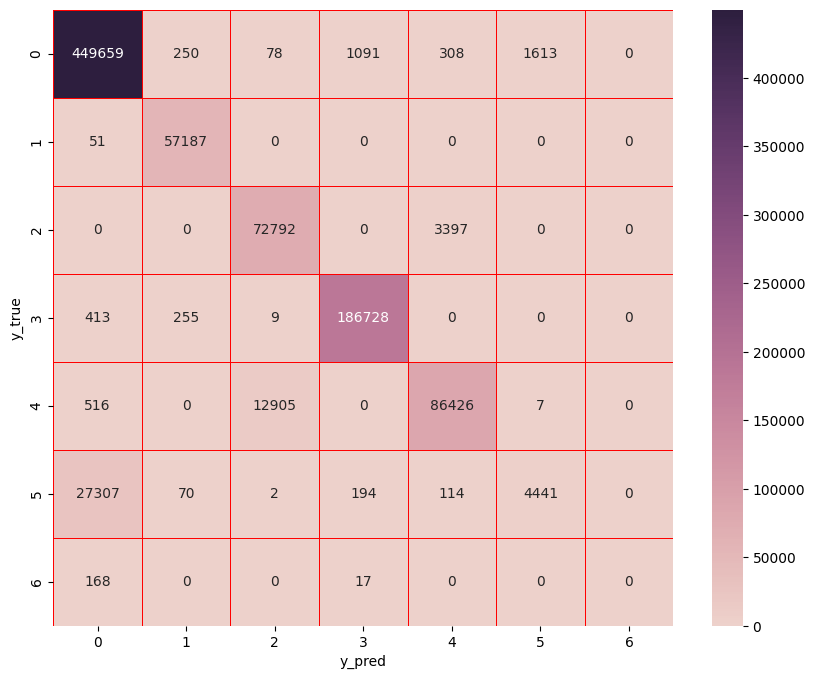

In [ ]:
print(classification_report(aggregated_data_test,actions))
cm=confusion_matrix(aggregated_data_test,actions)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()